# Diagnóstico estadístico y visual de series de tiempo financieras en Python

- **Juan Miguel Rodríguez Trujillo**
- **Octubre de 2025**

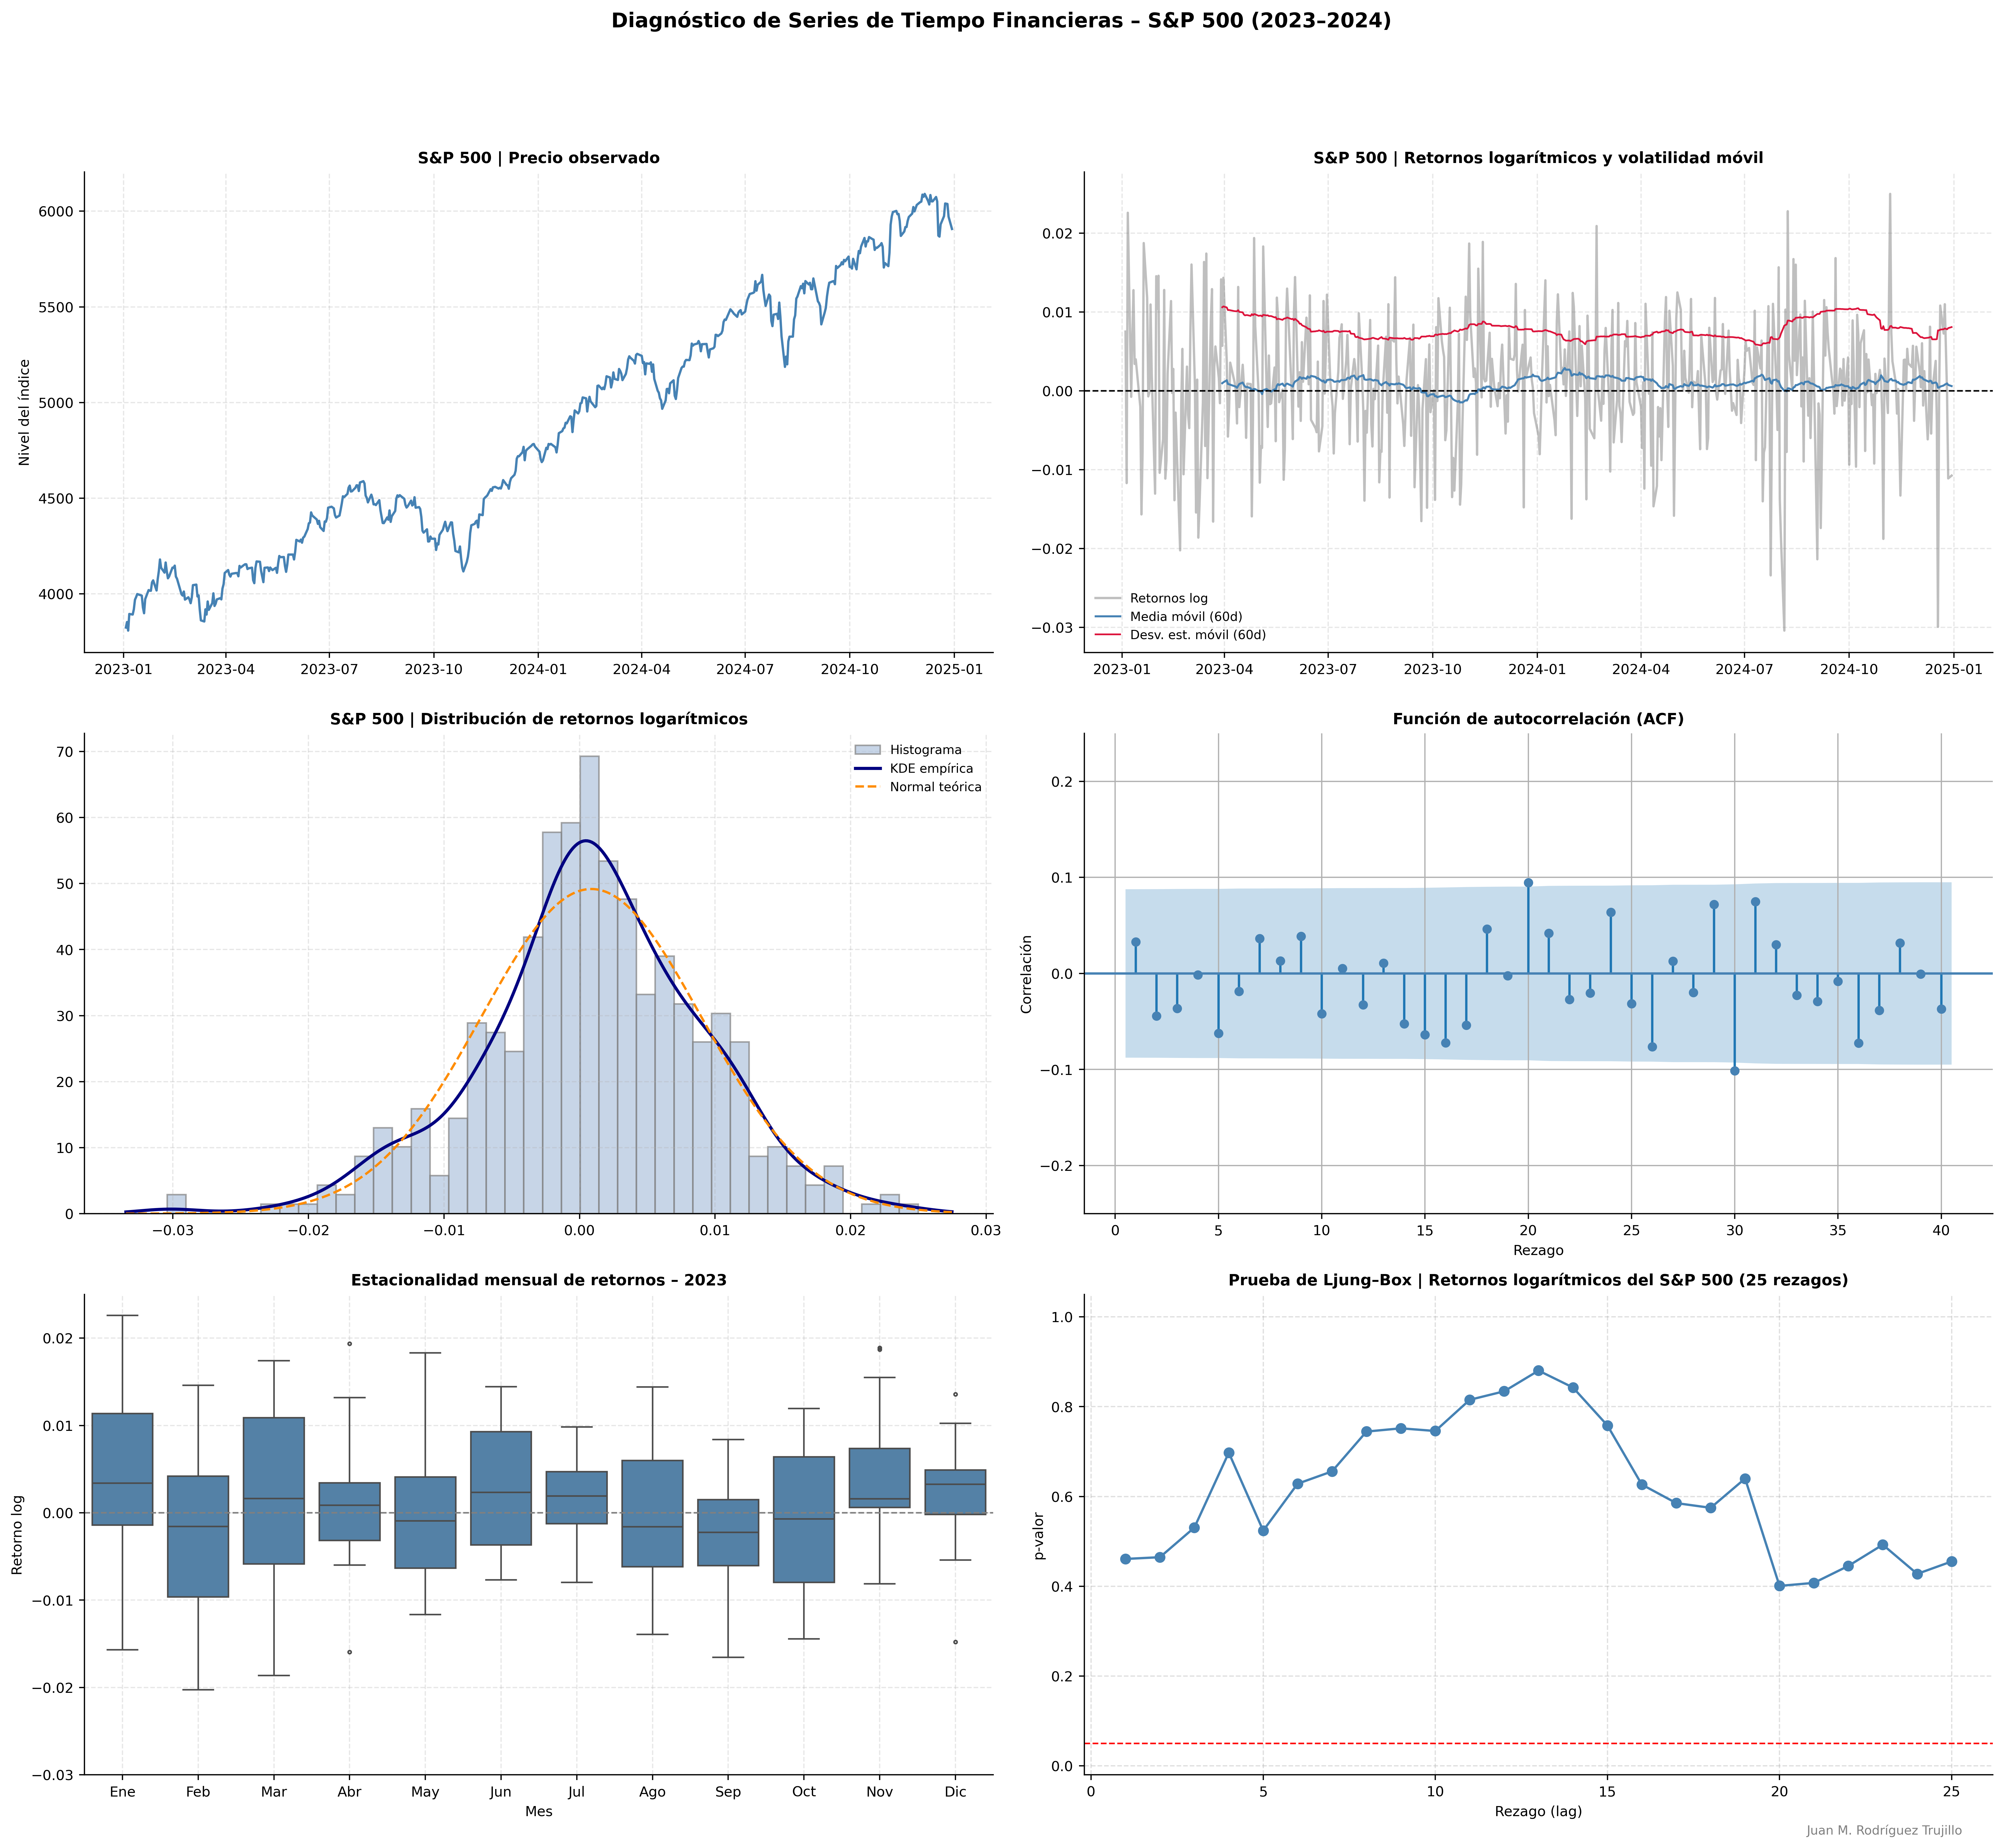

In [1]:
from IPython.display import Image
Image("portada_sp500_3x2.png")

## 1. Retornos simples y logarítmicos

El análisis de retornos financieros constituye el punto de partida de cualquier estudio cuantitativo sobre precios de activos. 
En esencia, un retorno mide la variación porcentual del valor de un activo entre dos momentos del tiempo, y permite expresar 
la ganancia o pérdida relativa de una inversión de manera comparable a través de activos, períodos y horizontes temporales.

Este notebook tiene como propósito formalizar el cálculo y la interpretación de los principales tipos de retornos
utilizados en finanzas cuantitativas: los retornos simples y los retornos logarítmicos.  
A través de un enfoque matemático y aplicado, se busca:

- Comprender las diferencias entre retornos brutos y netos en uno o varios períodos.  
- Derivar el concepto de retorno anualizado como media geométrica.  
- Discutir las limitaciones del promedio geométrico y la motivación para utilizar retornos logarítmicos.  
- Analizar cómo los log-retornos permiten tratamientos estadísticos más robustos y comparaciones temporales consistentes.

En resumen, el notebook pretende sentar una base teórica y práctica sólida sobre la medición de rentabilidad y su papel 
en el modelado de series financieras, la gestión de portafolios y la evaluación del desempeño de activos.



### ¿Qué es un retorno financiero y por qué es útil?

En finanzas, el retorno (o rendimiento) de un activo mide la proporción de ganancia o pérdida que un inversionista obtiene 
respecto al valor inicial de su inversión durante un determinado intervalo de tiempo.  
Formalmente, un retorno captura la dinámica relativa del precio, y permite expresar los movimientos del mercado 
en términos comparables e independientes de la magnitud del activo o del valor monetario invertido.

Matemáticamente, el retorno resume la relación entre el precio actual $P_t$ y el precio anterior $P_{t-1}$ :

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Esta simple razón tiene una gran importancia práctica. Los retornos permiten:
- Comparar activos heterogéneos (acciones, bonos, índices o criptomonedas) en una escala porcentual común.  
- Analizar desempeño temporal, ya que los retornos estandarizan la variación de precios entre diferentes períodos.  
- Evaluar riesgo y volatilidad, base para métricas como la desviación estándar, el VaR o el ratio de Sharpe.  
- Construir modelos econométricos y de predicción, dado que los retornos son más estables y estacionarios que los precios en niveles.

En síntesis, el retorno financiero es la unidad fundamental de medida para la rentabilidad, riesgo y eficiencia en los mercados.  
Comprender su cálculo y sus distintas formulaciones —simple o logarítmica— es esencial para cualquier análisis cuantitativo.



### Interpretación económica del retorno

### Retornos simples

Los retornos simples representan la forma más directa de medir la rentabilidad de un activo.  
Indican el cambio porcentual del precio entre dos períodos, expresando cuánto varía el valor de la inversión en términos relativos.

Se calculan como la variación del precio respecto a su nivel anterior:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Este tipo de retorno es ampliamente utilizado en reportes financieros, análisis descriptivos y comparaciones de corto plazo, ya que ofrece una interpretación inmediata como porcentaje de ganancia o pérdida sobre el valor invertido.


#### Retorno simple bruto (un período)

El retorno simple bruto mide la razón entre el precio final y el precio inicial de un activo en un solo período, 
sin descontar el valor invertido originalmente. Representa el factor de crecimiento total del precio entre los instantes $t-1$ y $t$.

Se define como:

$$
1 + R_t = \frac{P_t}{P_{t-1}}
$$

donde:
- $P_t$: precio del activo en el instante $t$,
- $P_{t-1}$: precio del activo en el instante anterior,
- $R_t$: retorno simple neto correspondiente al mismo período.

De esta relación también se desprende que el precio actual puede expresarse en función del precio anterior:

$$
P_t = P_{t-1}(1 + R_t)
$$

El retorno bruto indica cuántas veces se multiplica el valor inicial del activo tras un período de inversión.  
Por ejemplo, si $R_t = 0.05$, entonces $1 + R_t = 1.05$: el activo ha crecido un 5% respecto a su valor previo.


#### Retorno simple neto (un período)

El retorno simple neto —o simplemente retorno simple— mide la variación porcentual efectiva del precio de un activo durante un solo período, descontando el valor inicial de la inversión. A diferencia del retorno bruto, expresa directamente la ganancia o pérdida relativa obtenida.

Se define como:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$$

donde:
- $R_t > 0$: indica una apreciación del activo (ganancia),
- $R_t < 0$: indica una depreciación (pérdida).

Esta formulación permite expresar cualquier variación de precios en términos porcentuales, independientemente de la magnitud del activo. Por ejemplo, si un precio pasa de 100 a 108 unidades monetarias, entonces:

$$
R_t = \frac{108 - 100}{100} = 0.08 \;\; \text{o un } 8\%.
$$

El retorno neto constituye la unidad básica de análisis financiero, utilizada en estadísticas descriptivas, estimación de volatilidad y cálculo de rentabilidades promedio.


#### Retornos simples en varios períodos

Cuando una inversión se mantiene durante varios períodos consecutivos, los retornos individuales se componen de manera multiplicativa. El valor del activo al final del período $t$ dependerá del valor inicial $P_{t-n}$ y de los retornos simples obtenidos en cada subperíodo intermedio.

La relación general se expresa como:

$$
P_t = P_{t-n} \,(1 + R_t)(1 + R_{t-1}) \dots (1 + R_{t-n+1})
$$

A partir de esta identidad, se define el retorno simple acumulado o de $n$ períodos como:

$$
1 + R_t[n] = \frac{P_t}{P_{t-n}} = (1 + R_t)(1 + R_{t-1}) \dots (1 + R_{t-n+1})
$$

De forma más compacta, utilizando la notación de productoria:

$$
1 + R_t[n] = \frac{P_t}{P_{t-n}} = \prod_{i=0}^{n-1}(1 + R_{t-n})
$$


Por tanto, el retorno simple acumulado de $n$  períodos es:

$$
R_t[n] = \prod_{i=0}^{n-1}(1 + R_{t-n}) - 1
$$

Esta expresión muestra que los retornos simples no son aditivos en el tiempo, ya que el efecto compuesto 
proviene del producto de los factores $(1 + R)$. En otras palabras, la rentabilidad acumulada de varios períodos no se obtiene sumando los retornos, sino 
multiplicando los factores de crecimiento.

Como ejemplo, si una acción sube un 10% el primer período y un 5% el segundo, el retorno total será:

$$
R_t[2] = (1 + 0.10)(1 + 0.05) - 1 = 0.155 \;\; \text{o un } 15.5\%.
$$

De manera equivalente, la rentabilidad acumulada también puede expresarse directamente en función de los precios inicial y final:

$$
R_t[n] = \frac{P_t - P_{t-n}}{P_{t-n}}
$$

Esta última forma resume el cambio porcentual total entre los extremos del intervalo, y coincide con el resultado obtenido mediante la composición multiplicativa.

#### Retorno simple anualizado (media geométrica)

El retorno simple anualizado busca expresar el rendimiento promedio equivalente que habría generado una inversión si hubiera crecido de forma constante a lo largo de varios períodos. Este promedio corresponde a la media geométrica de los factores de crecimiento $(1 + R_t)$.

Si una inversión se mantiene durante $n$ períodos con retornos $R_t, R_{t-1}, \dots, R_{t-n+1}$, el retorno acumulado total es:

$$
1 + R_t[n] = \prod_{i=0}^{n-1}(1 + R_{t-i})
$$

Para calcular el retorno anualizado promedio, se obtiene la raíz $n$-ésima de este producto y se resta 1:

$$
R_t^{anual}[n] = \left( \prod_{i=0}^{n-1}(1 + R_{t-i}) \right)^{\frac{1}{n}} - 1
$$

Esta expresión equivale a la media geométrica de los retornos brutos $(1 + R_t)$:

$$
R_t^{anual}[n] = \text{GM}\big(1 + R_t, 1 + R_{t-1}, \dots, 1 + R_{t-n+1}\big) - 1
$$

Desde el punto de vista económico, este valor representa la tasa de crecimiento promedio que, aplicada de manera constante, 
produciría el mismo rendimiento acumulado que los retornos reales variables observados. En otras palabras, si el portafolio creciera al ritmo fijo $R_t^{annual}[n]$ cada período, al cabo de $n$ períodos alcanzaría el mismo valor final $P_t$.

Formalmente:

$$
P_t = P_{t-n} \,(1 + R_t^{annual}[n])^{n}
$$

Ejemplo:

Suponga una inversión con retornos anuales de $10\%$, $5\%$ y $8\%$ durante tres años consecutivos. El retorno anualizado será:

$$
R_t^{annual}[3] = \big[(1.10)(1.05)(1.08)\big]^{1/3} - 1 = 0.0768 \;\; \text{o un } 7.68\%.
$$

Esto significa que obtener un retorno constante del 7.68% anual durante tres años produciría el mismo crecimiento total 
que la secuencia de retornos reales.

#### Problemas del promedio geométrico

Aunque la media geométrica representa una medida precisa del crecimiento compuesto del capital, 
presenta limitaciones conceptuales y prácticas que la hacen menos conveniente para ciertos análisis financieros, 
especialmente cuando se requiere modelar retornos o comparar distribuciones estadísticas.


#### 1. No aditividad temporal

El principal inconveniente de los retornos simples y su media geométrica es que no son aditivos en el tiempo.  
Si se desea combinar retornos de distintos períodos, no es posible hacerlo mediante una simple suma:

$$
R_t[n] \neq R_t + R_{t-1} + \dots + R_{t-n+1}
$$

sino mediante el producto de los factores de crecimiento:

$$
1 + R_t[n] = \prod_{i=0}^{n-1}(1 + R_{t-i})
$$

Esto implica que el análisis de retornos acumulados requiere una manipulación no lineal de los datos, 
lo que complica tareas como la estimación de medias, la construcción de intervalos de confianza o la modelación estadística.


#### 2. Sesgo por volatilidad

La media geométrica penaliza la volatilidad, ya que incorpora el efecto compuesto de las pérdidas. Una caída porcentual nunca se compensa con un aumento de igual magnitud.

Por ejemplo:

| Período | Retorno (\(R_t\)) |
|----------|-------------------|
| 1 | \(+50\%\) |
| 2 | \(-50\%\) |

El rendimiento promedio aritmético sería $(0.5 + (-0.5)) / 2 = 0$ ,  
pero el valor final se reduce a:

$$
(1 + 0.5)(1 - 0.5) - 1 = -0.25 \;\; \text{o una pérdida del } 25\%.
$$

Así, el retorno geométrico refleja correctamente el impacto del riesgo, pero no puede descomponerse ni sumarse de manera directa.


#### 3. Falta de linealidad estadística

En econometría y teoría de portafolios, se requiere que los retornos sean lineales y aditivos 
para poder aplicar herramientas estadísticas como la media, la varianza o la covarianza. Sin embargo, la composición multiplicativa de los retornos simples rompe estas propiedades, 
por lo que la agregación o descomposición temporal se vuelve menos tractable analíticamente.


#### 4. Sensibilidad al horizonte temporal

El promedio geométrico depende del número de períodos $(n)$.  
Al modificar la frecuencia de cálculo (diaria, mensual, anual), el valor cambia, 
lo que dificulta comparar activos o estrategias medidas en horizontes distintos.

Formalmente, si $R_t^{(d)}$ son retornos diarios y $R_t^{(m)}$ mensuales:

$$
R_t^{(m)} \neq 30 \times R_t^{(d)}
$$

Esto ocurre porque la media geométrica captura efectos de composición y no crece linealmente con el tiempo.

#### 5. Motivación para los retornos logarítmicos

Estas limitaciones motivan el uso de los retornos logarítmicos, definidos como:

$$
r_t = \ln(1 + R_t)
$$

Los log-retornos son aditivos, simétricos y estadísticamente más manejables, permitiendo linealizar la relación multiplicativa:

$$
\ln\!\left(\prod_{i=0}^{n-1}(1 + R_{t-i})\right) = \sum_{i=0}^{n-1}\ln(1 + R_{t-i})
$$

Gracias a esta propiedad, los retornos logarítmicos facilitan la estimación de tasas medias, 
la comparación entre horizontes y el desarrollo de modelos de crecimiento continuo en finanzas cuantitativas.

En síntesis, aunque el promedio geométrico representa fielmente la rentabilidad compuesta, 
su falta de aditividad y su sensibilidad a la volatilidad lo vuelven menos conveniente 
para el análisis estadístico y la modelación.  
De ahí que, en contextos cuantitativos, se prefiera utilizar retornos logarítmicos.

### Retornos logarítmicos y promedio aritmético

Los retornos logarítmicos —también llamados continuamente compuestos— ofrecen una forma alternativa de medir rentabilidad, 
basada en el logaritmo natural del factor de crecimiento de precios. A diferencia de los retornos simples, los log-retornos son aditivos en el tiempo y poseen propiedades estadísticas más favorables.

Se definen como:

$$
r_t = \ln(1 + R_t) = \ln\!\left(\frac{P_t}{P_{t-1}}\right)
$$

donde:
- $r_t$: retorno logarítmico en el período \( t \),
- $R_t$: retorno simple en el mismo período,
- $P_t, P_{t-1}$: precios del activo en los períodos consecutivos.

#### 1. Propiedad de aditividad temporal

Dado que el logaritmo transforma productos en sumas, los retornos logarítmicos se pueden agregar linealmente en el tiempo:

$$
r_t[n] = \ln\!\left(\prod_{i=0}^{n-1}(1 + R_{t-i})\right)
        = \sum_{i=0}^{n-1}\ln(1 + R_{t-i})
        = \sum_{i=0}^{n-1} r_{t-i}
$$

Esta propiedad hace que los log-retornos sean ideales para el análisis de rentabilidad acumulada, ya que la suma de los log-retornos individuales equivale al retorno total del período compuesto.


#### 2. Conexión con el retorno simple

Existe una relación exacta entre ambos tipos de retornos:

$$
R_t = e^{r_t} - 1
$$

y una aproximación muy útil cuando los retornos son pequeños $|R_t| < 0.1$:

$$
r_t = \ln(1 + R_t) \approx R_t - \frac{1}{2}R_t^2 \approx R_t
$$

Por tanto, para movimientos moderados de precios, los retornos logarítmicos y simples son prácticamente equivalentes, 
pero el primero mantiene ventajas analíticas al trabajar con períodos largos o alta frecuencia.

#### 3. Promedio aritmético de log-retornos

Dado que los log-retornos son aditivos, su promedio es simplemente:

$$
\bar{r} = \frac{1}{k}\sum_{j=0}^{k-1} r_{t-j}
$$

La rentabilidad media equivalente en términos simples se obtiene mediante la exponenciación del promedio logarítmico:

$$
R_t^{annual}[k] = e^{\bar{r}} - 1
$$

Esta expresión es exactamente equivalente a la media geométrica de los retornos simples, 
pero con un tratamiento más lineal y manejable estadísticamente.


#### 4. Ventajas estadísticas y de modelación

Los retornos logarítmicos son preferidos en análisis cuantitativo por varias razones:

- Aditividad temporal → se pueden sumar directamente para calcular rendimientos acumulados.  
- Simetría → un retorno de $-x\%$ y luego $+x\%$ no distorsionan la media logarítmica.  
- Tractabilidad estadística → tienden a ser más cercanos a la distribución normal que los retornos simples.  
- Facilidad de modelación → usados en modelos de crecimiento exponencial, como Black–Scholes o CAPM continuo.


En resumen, los retornos logarítmicos permiten un tratamiento lineal, aditivo y estadísticamente estable de la rentabilidad.  
Su promedio aritmético representa una tasa de crecimiento promedio compuesta, y constituye la base para la mayoría de los modelos financieros de tiempo continuo.


## 2. Diagnóstico visual inicial

El análisis visual es el primer paso para comprender el comportamiento de una serie financiera. Antes de aplicar pruebas estadísticas o transformaciones, la inspección gráfica permite detectar patrones, rupturas estructurales y periodos de alta o baja volatilidad.

En esta etapa se utilizan los precios observados y sus transformaciones básicas —retornos, volatilidad móvil y distribuciones— para construir una narrativa preliminar del activo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm, gaussian_kde
import yfinance as yf

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 10

In [3]:
spx = pd.read_csv("sp500.csv", skiprows=3, names=["Date", "Close"])

spx["Date"] = pd.to_datetime(spx["Date"], errors = "coerce")
spx["Close"] = pd.to_numeric(spx["Close"])
spx = spx.dropna().sort_values("Date").set_index("Date")

spx.rename(columns={"Close": "price"}, inplace=True)

### Serie observada

El gráfico de precios muestra la trayectoria temporal del activo.
Permite identificar tendencias, picos, caídas abruptas o cambios de nivel.
Aunque es visualmente informativo, este tipo de serie suele ser no estacionaria, por lo que más adelante será transformada en retornos para análisis estadístico.

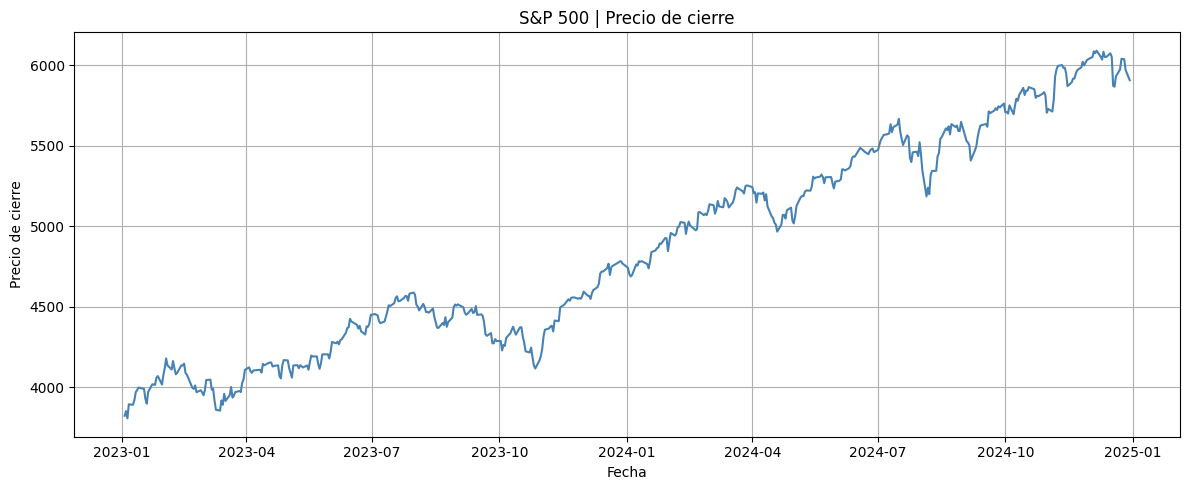

In [4]:
fig, ax = plt.subplots()
ax.plot(spx.index, spx["price"], color="steelblue")
ax.set_title("S&P 500 | Precio de cierre")
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio de cierre")
plt.tight_layout()
plt.show()

### Retornos logarítmicos

Transformar los precios en retornos logarítmicos permite observar las fluctuaciones porcentuales en lugar de los niveles.
Estos retornos tienden a estabilizar la varianza y son la base para la mayoría de los análisis financieros.

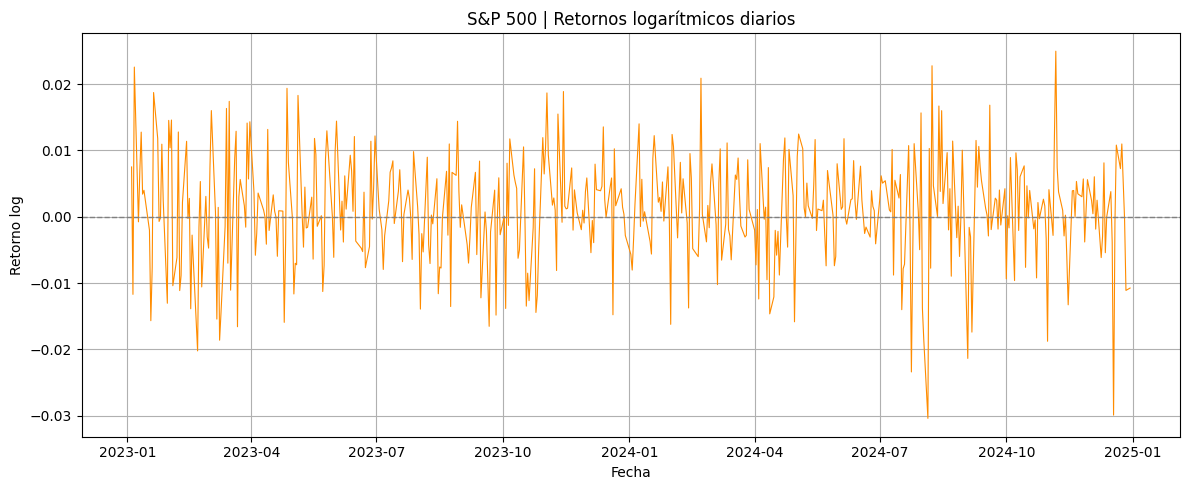

In [5]:
spx["rets"] = np.log(spx["price"] / spx["price"].shift(1))

fig, ax = plt.subplots()
ax.plot(spx.index, spx["rets"], color="darkorange", linewidth=0.8)
ax.axhline(0, linestyle="--", color="gray", linewidth=1)
ax.set_title("S&P 500 | Retornos logarítmicos diarios")
ax.set_xlabel("Fecha")
ax.set_ylabel("Retorno log")
plt.tight_layout()
plt.show()

### Volatilidad móvil

La desviación estándar móvil de los retornos cuantifica la variabilidad local de la serie.
Su representación gráfica permite detectar episodios de alta incertidumbre, donde las fluctuaciones son amplias y persistentes.

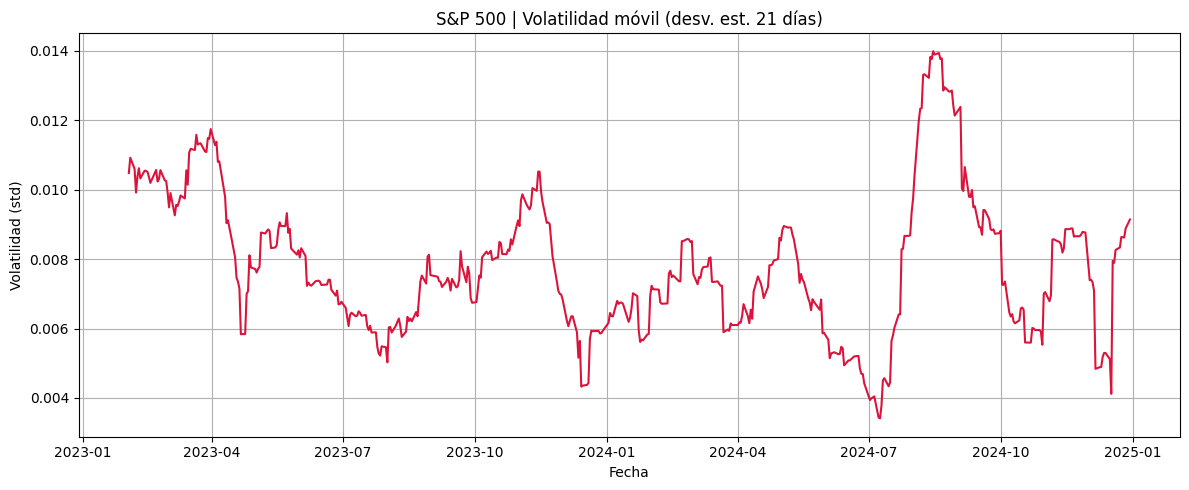

In [6]:
spx["vol_21"] = spx["rets"].rolling(window=21, min_periods=21).std()

fig, ax = plt.subplots()
ax.plot(spx.index, spx["vol_21"], color="crimson")
ax.set_title("S&P 500 | Volatilidad móvil (desv. est. 21 días)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Volatilidad (std)")
plt.tight_layout()
plt.show()

### Retornos acumulados

El retorno acumulado muestra el crecimiento porcentual total de la inversión a lo largo del tiempo, suponiendo reinversión continua de los rendimientos.
Es útil para comparar desempeño entre activos o periodos.

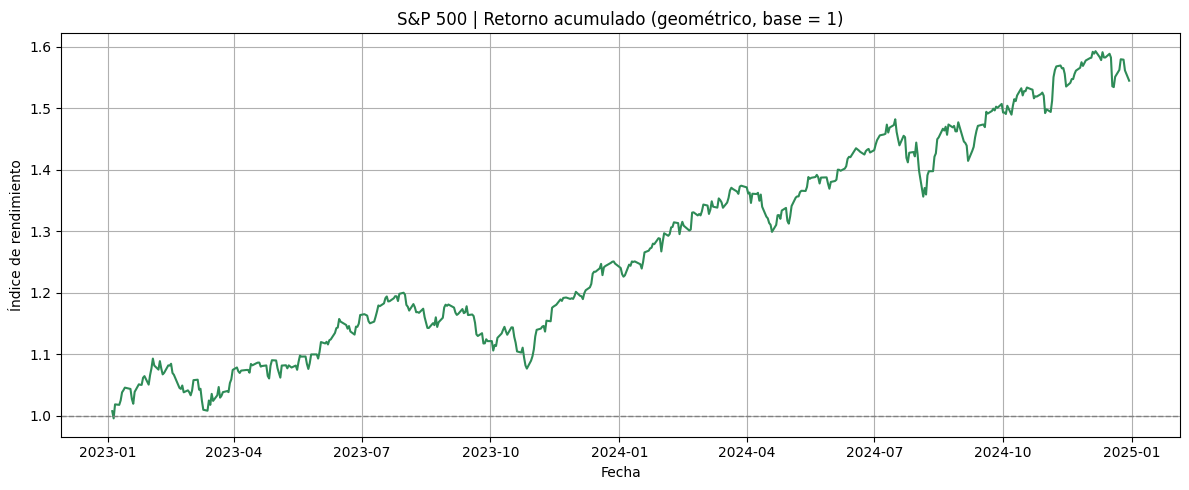

In [7]:
spx["cumret"] = np.exp(spx["rets"].cumsum())

fig, ax = plt.subplots()
ax.plot(spx.index, spx["cumret"], color="seagreen")
ax.axhline(1.0, linestyle="--", color="gray", linewidth=1)
ax.set_title("S&P 500 | Retorno acumulado (geométrico, base = 1)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Índice de rendimiento")
plt.tight_layout()
plt.show()

### Distribución de retornos

Complementariamente, se analiza la forma de la distribución de retornos mediante histogramas, estimaciones de densidad (KDE) y gráficos Q-Q. Estas herramientas permiten identificar si los retornos siguen una distribución normal o presentan colas gruesas, sesgo o curtosis elevada.

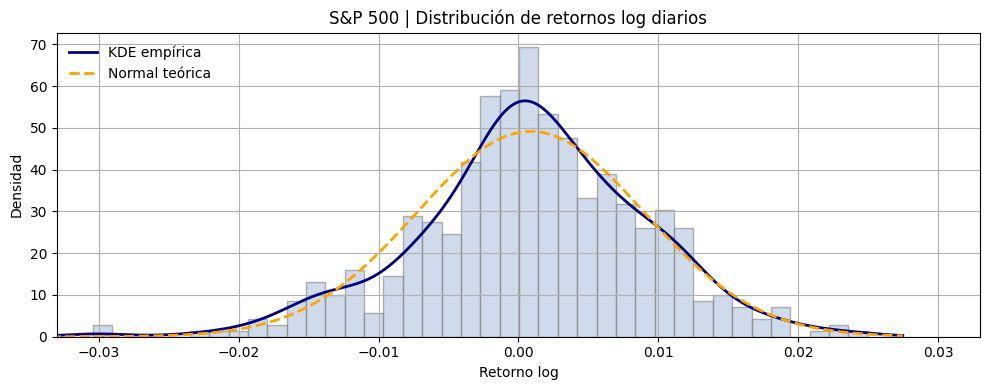

In [8]:
data = spx["rets"].dropna()
kde = gaussian_kde(data)
x_grid = np.linspace(data.min()*1.1, data.max()*1.1, 400)
y_kde = kde.evaluate(x_grid)
mu, sigma = data.mean(), data.std()
y_norm = norm.pdf(x_grid, mu, sigma)


fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(data, bins=40, density=True, alpha=0.6, color="lightsteelblue", 
        edgecolor="gray")
ax.plot(x_grid, y_kde,  color="navy", linewidth=2, label="KDE empírica")
ax.plot(x_grid, y_norm, color="orange", linestyle="--", linewidth=2, 
        label="Normal teórica")
ax.set_title("S&P 500 | Distribución de retornos log diarios")
ax.set_xlabel("Retorno log")
ax.set_ylabel("Densidad")
ax.set_xlim(-0.033, 0.033)
ax.legend(loc="upper left", frameon=False)
ax.grid(True)

plt.tight_layout()
plt.show()

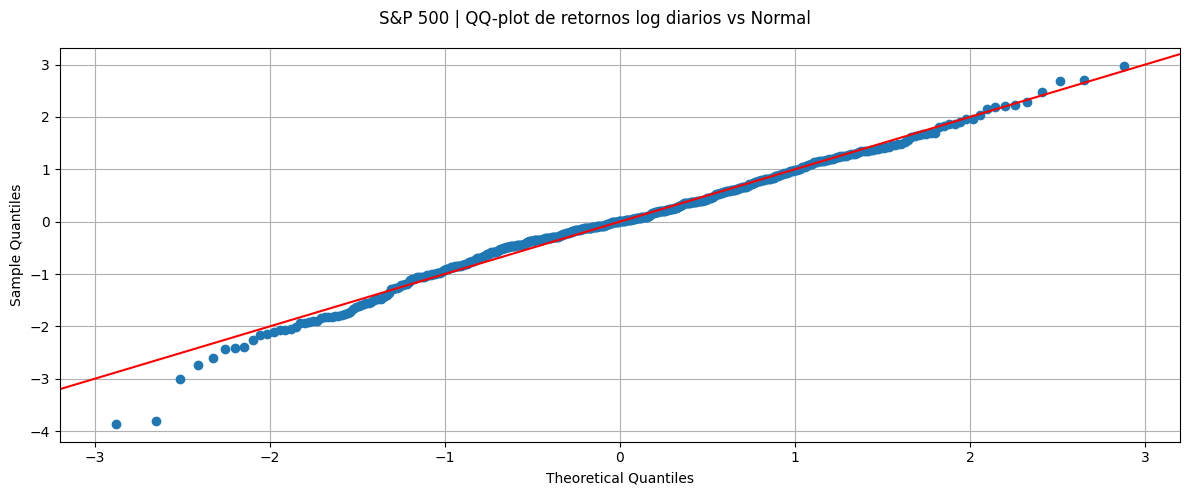

In [9]:
fig = qqplot(data, line="45", fit=True)
plt.suptitle("S&P 500 | QQ-plot de retornos log diarios vs Normal") 
plt.tight_layout() 
plt.xlim(-3.2, 3.2) 
plt.show()

In [10]:
from scipy.stats import shapiro, normaltest
print(shapiro(data))
print(normaltest(data))

ShapiroResult(statistic=np.float64(0.9899127845897847), pvalue=np.float64(0.0016570631524035011))
NormaltestResult(statistic=np.float64(14.21978954387989), pvalue=np.float64(0.0008169809569031914))


Ambas pruebas —Shapiro-Wilk y D’Agostino-Pearson— rechazan la hipótesis nula de normalidad (
𝑝
<
0.01
p<0.01). Esto confirma que la distribución de los retornos logarítmicos del S&P 500 no es normal: presenta colas más gruesas y un leve sesgo, lo que implica una mayor frecuencia de eventos extremos en comparación con lo esperado bajo una distribución gaussiana. Este comportamiento es característico de las series financieras y refleja la naturaleza volátil e intermitente de los mercados.

## 3. Descomposición de una serie de tiempo

El objetivo de la descomposición es separar una serie temporal en sus componentes básicos —tendencia, estacionalidad y residual— para entender mejor su estructura interna.

En el caso de precios financieros, la tendencia suele reflejar el crecimiento o caída de largo plazo, mientras que la estacionalidad puede capturar patrones repetitivos (como efectos mensuales o trimestrales). El residuo, por su parte, agrupa los movimientos irregulares o “ruido” del mercado.

Aunque los precios del S&P 500 no presentan una estacionalidad pronunciada como una variable económica mensual, esta descomposición ayuda a visualizar la contribución relativa de cada componente.

### Implementación de algoritmo STL 

Una forma más robusta y moderna de descomponer una serie temporal es mediante el método STL (Seasonal-Trend decomposition using LOESS).
A diferencia de la descomposición clásica, que aplica medias móviles fijas, STL utiliza ajustes locales suavizados (LOESS) para estimar la tendencia y la estacionalidad, ofreciendo mayor flexibilidad ante cambios estructurales y valores atípicos.

En el contexto financiero, esta técnica resulta especialmente útil para analizar la tendencia de largo plazo de un activo y detectar patrones cíclicos suaves en escalas temporales mensuales o semanales.
Aunque el S&P 500 no presenta una estacionalidad marcada, la descomposición STL permite visualizar con claridad tres componentes clave:

- Tendencia: trayectoria de largo plazo del índice, filtrando la volatilidad diaria.

- Estacionalidad: fluctuaciones periódicas o cíclicas leves.

- Residual: variaciones irregulares y shocks del mercado.

El siguiente bloque aplica STL sobre el logaritmo del precio mensual del S&P 500, utilizando un modelo robusto a outliers y un período estacional de 12 meses, lo que permite observar la estructura subyacente de la serie con mayor claridad visual y estabilidad estadística.

C:\Users\juanr\AppData\Local\Temp\ipykernel_13980\794823173.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_m = np.log(spx["price"].resample("M").last().dropna())


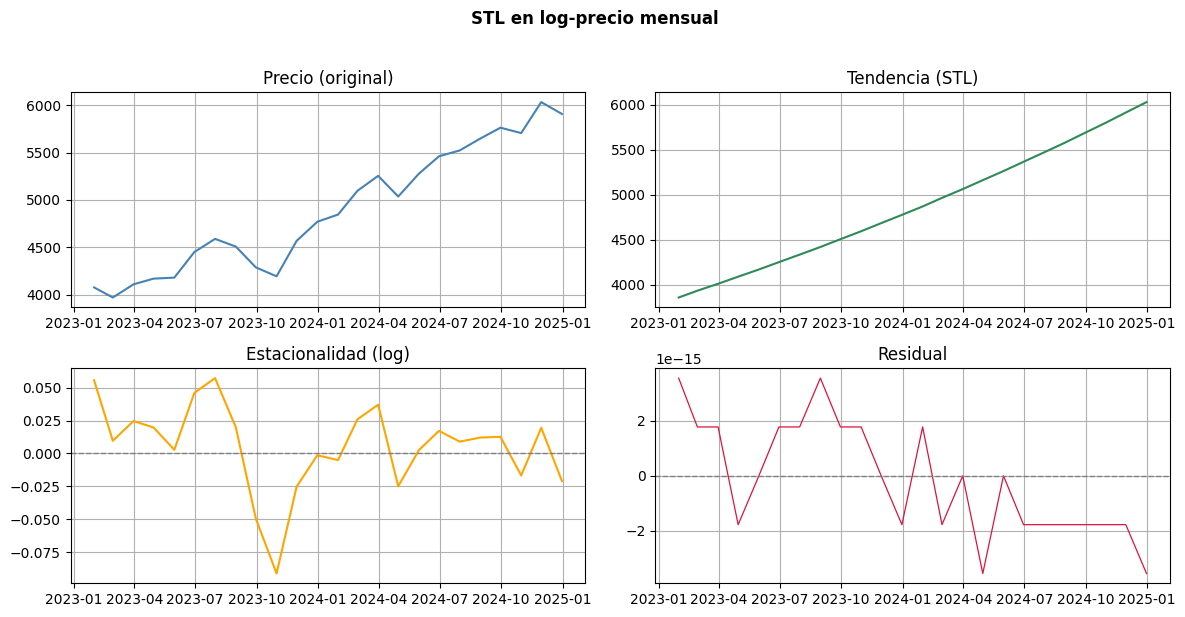

In [11]:
from statsmodels.tsa.seasonal import STL

y_m = np.log(spx["price"].resample("M").last().dropna())

stl = STL(y_m, period=12, robust=True)
res = stl.fit()

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.ravel()

axs[0].plot(y_m.index, np.exp(y_m), color="steelblue")
axs[0].set_title("Precio (original)")

axs[1].plot(res.trend.index, np.exp(res.trend), color="seagreen")
axs[1].set_title("Tendencia (STL)")

axs[2].plot(res.seasonal.index, res.seasonal, color="orange")
axs[2].axhline(0, ls="--", color="gray", lw=1)
axs[2].set_title("Estacionalidad (log)")

axs[3].plot(res.resid.index, res.resid, color="crimson", lw=0.9)
axs[3].axhline(0, ls="--", color="gray", lw=1)
axs[3].set_title("Residual")

for ax in axs:
    ax.grid(True)
plt.suptitle("STL en log-precio mensual", y=1.02, fontsize=12, fontweight="semibold")
plt.tight_layout()
plt.show()

### Análisis visual de la estacionalidad

Aunque las series financieras diarias o mensuales no presentan una estacionalidad fuerte (como las ventas o la producción industrial), sí pueden mostrar regularidades temporales:
efectos de mes, trimestre o incluso “efectos calendario” (enero, fin de año, vacaciones, etc.).

El objetivo aquí no es probar estacionalidad formalmente, sino visualizar patrones repetitivos en el tiempo.

#### Box-plot de estacionalidad por mes

Este tipo de gráfico muestra cómo varían los retornos diarios según el mes del año (y por año).

C:\Users\juanr\AppData\Local\Temp\ipykernel_13980\3338078253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(
C:\Users\juanr\AppData\Local\Temp\ipykernel_13980\3338078253.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(


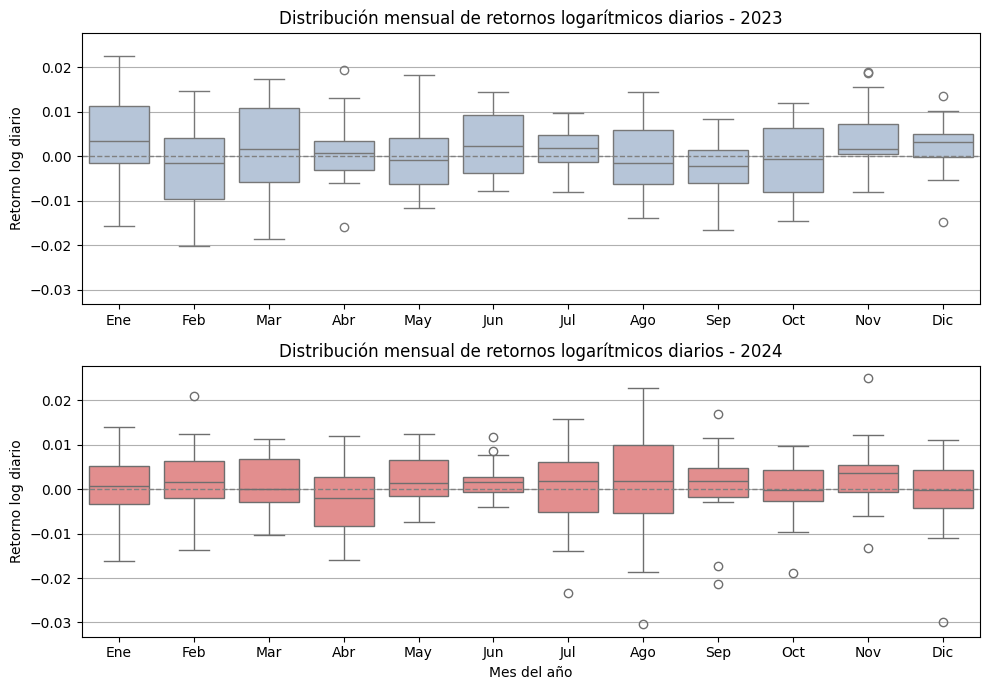

In [12]:
rets_2023 = spx["rets"]["2023"].to_frame("ret")
rets_2023["month"] = rets_2023.index.month

rets_2024 = spx["rets"]["2024"].to_frame("ret")
rets_2024["month"] = rets_2024.index.month

fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharey=True)

sns.boxplot(data=rets_2023, x="month", y="ret",
    color="lightsteelblue", ax=axs[0])
axs[0].axhline(0, ls="--", color="gray", lw=1)
axs[0].set_title("Distribución mensual de retornos logarítmicos diarios - 2023")
axs[0].set_xlabel("")
axs[0].set_ylabel("Retorno log diario")
axs[0].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

sns.boxplot(data=rets_2024, x="month", y="ret", 
            color="lightcoral", ax=axs[1])
axs[1].axhline(0, ls="--", color="gray", lw=1)
axs[1].set_title("Distribución mensual de retornos logarítmicos diarios - 2024")
axs[1].set_xlabel("Mes del año")
axs[1].set_ylabel("Retorno log diario")
axs[1].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

plt.tight_layout()
plt.show()

## Heatmap de estacionalidad por mes

Un mapa de calor muestra la evolución mensual por año, útil para ver periodos de retornos positivos/negativos agrupados.

C:\Users\juanr\AppData\Local\Temp\ipykernel_13980\2042380713.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets_m = spx["rets"].resample("M").sum().to_frame("ret_m")


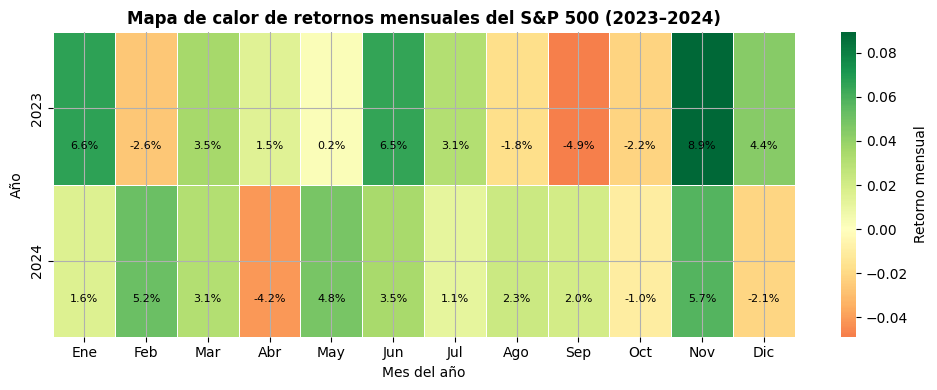

In [13]:
rets_m = spx["rets"].resample("M").sum().to_frame("ret_m")
rets_m["year"] = rets_m.index.year
rets_m["month"] = rets_m.index.month

rets_m["ret_m_exp"] = np.exp(rets_m["ret_m"]) - 1

pivot = rets_m.pivot(index="year", columns="month", values="ret_m_exp")

plt.rcParams.update({
    "axes.titleweight": "semibold",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 10,
})

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(pivot, cmap="RdYlGn", center=0, annot=False, fmt=".1%",
    linewidths=0.5, cbar_kws={"label": "Retorno mensual"},
    ax=ax)

for y in range(pivot.shape[0]):
    for x in range(pivot.shape[1]):
        val = pivot.iloc[y, x]
        if not np.isnan(val):
            ax.text(
                x + 0.5, y + 0.75,      
                f"{val:.1%}",
                ha="center", va="center",
                fontsize=8, color="black"
            )

ax.set_title("Mapa de calor de retornos mensuales del S&P 500 (2023–2024)")
ax.set_xlabel("Mes del año")
ax.set_ylabel("Año")
ax.set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun",
     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"],
    rotation=0)


plt.tight_layout()
plt.show()


## 4. Estacionariedad y transformaciones

En el análisis de series de tiempo, una serie se considera estacionaria si sus propiedades estadísticas —media y varianza— son constantes en el tiempo.

En términos prácticos, una serie estacionaria no presenta tendencia determinista ni cambios estructurales en su dispersión, lo que permite aplicar modelos estadísticos de forma más estable y comparativa.

En finanzas, los precios suelen ser no estacionarios (crecen con el tiempo y tienen varianza cambiante), mientras que los retornos tienden a ser estacionarios en media, aunque con varianza heterocedástica (volatilidad cambiante).

Por ello, antes de modelar o estimar cualquier relación, es crucial diagnosticar la estacionariedad y aplicar las transformaciones adecuadas.

### Diagnóstico visual de la estacionariedad

Podemos inspeccionar visualmente si una serie parece estacionaria mediante:

- El gráfico de precios vs. retornos: los precios muestran tendencia y niveles crecientes; los retornos fluctúan alrededor de cero.

- Media y desviación estándar móvil: si la media o la dispersión cambian con el tiempo, la serie no es estacionaria.

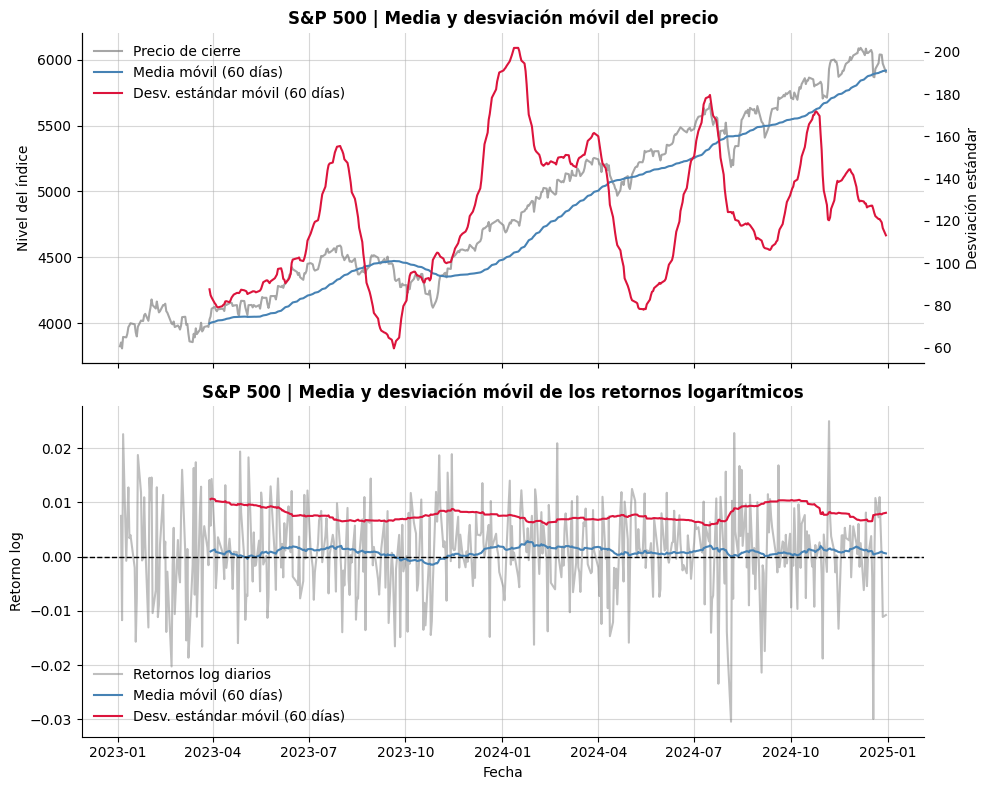

In [14]:
window = 60

rolling_mean_price = spx["price"].rolling(window).mean()
rolling_std_price = spx["price"].rolling(window).std()

rolling_mean_rets = spx["rets"].rolling(window).mean()
rolling_std_rets = spx["rets"].rolling(window).std()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1 = axs[0]
ax1.plot(spx["price"], color="grey", alpha=0.7, label="Precio de cierre")
ax1.plot(rolling_mean_price, color="steelblue", label=f"Media móvil ({window} días)")
ax1.set_ylabel("Nivel del índice", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1b = ax1.twinx()
ax1b.plot(rolling_std_price, color="crimson", label=f"Desv. estándar móvil ({window} días)")
ax1b.set_ylabel("Desviación estándar", color="black")
ax1b.tick_params(axis="y", labelcolor="black")
ax1.set_title("S&P 500 | Media y desviación móvil del precio")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", frameon=False)
ax1.grid(alpha = 0.5)  
ax1b.grid(False) 


ax2 = axs[1]
ax2.plot(spx["rets"], color="grey", alpha=0.5, label="Retornos log diarios")
ax2.plot(rolling_mean_rets, color="steelblue", label=f"Media móvil ({window} días)")
ax2.plot(rolling_std_rets, color="crimson", label=f"Desv. estándar móvil ({window} días)")
ax2.axhline(0, ls="--", color="black", lw=1)
ax2.set_title("S&P 500 | Media y desviación móvil de los retornos logarítmicos")
ax2.set_xlabel("Fecha")
ax2.set_ylabel("Retorno log")
ax2.legend(loc="lower left", frameon=False)
ax2.grid(alpha = 0.5)

plt.tight_layout()
plt.show()

La comparación deja en evidencia que los precios del S&P 500 exhiben un comportamiento no estacionario: la media y la volatilidad aumentan con el tiempo, reflejando la tendencia de largo plazo del mercado.

En contraste, los retornos logarítmicos fluctúan alrededor de un promedio cercano a cero, manteniendo una varianza más acotada, lo que confirma su carácter aproximadamente estacionario en media.

### Evidencia formal de la estacionariedad

La prueba ADF (Augmented Dickey-Fuller) contrasta la hipótesis de raíz unitaria, que implica no estacionariedad:

$H°:$ la serie tiene raíz unitaria (no estacionaria) 

$Ha:$ la serie no tiene raíz unitaria (estacionaria) 


Aplicaremos la prueba tanto a los precios como a los retornos logarítmicos.

In [15]:
from statsmodels.tsa.stattools import adfuller

adf_price = adfuller(spx["price"].dropna())
adf_rets = adfuller(spx["rets"].dropna())

results = pd.DataFrame({
    "Serie": ["Precio", "Retornos log"],
    "Estadístico ADF": [adf_price[0], adf_rets[0]],
    "p-valor": [adf_price[1], adf_rets[1]],
    "N observaciones": [adf_price[3], adf_rets[3]]
})

print(results.round(4))


          Serie  Estadístico ADF  p-valor  N observaciones
0        Precio          -0.6424   0.8611              500
1  Retornos log         -21.5391   0.0000              499


El S&P 500 muestra un comportamiento claramente no estacionario en niveles, pero al transformar la serie en retornos logarítmicos, el p-valor cae por debajo del 1 %, rechazando la hipótesis nula de raíz unitaria. Esto confirma que los retornos fluctúan alrededor de una media estable, sin tendencia persistente.

### Transformaciones para estabilizar media y varianza

Una de las formas más efectivas de lograr estacionariedad en series de tiempo no estacionarias consiste en aplicar transformaciones que reduzcan la tendencia o estabilicen la varianza.  

En el caso de los datos financieros, estas transformaciones tienen también una interpretación económica directa:  
convierten los precios absolutos en variaciones relativas (retornos), que son la magnitud relevante para medir rentabilidad y riesgo.

De forma general, podemos distinguir tres tipos de transformaciones fundamentales:

| Tipo de transformación | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fórmula&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Objetivo |
|-------------------------|----------|-----------|
| Diferencia simple | $ \Delta P_t = P_t - P_{t-1}$ | Elimina tendencias lineales o deterministas. |
| Transformación logarítmica | $Y_t = \ln(P_t)$ | Suaviza la escala y estabiliza la varianza relativa. |
| Diferencia logarítmica (retorno log) | $r_t = \ln(P_t) - \ln(P_{t-1})$ | Elimina tendencia y estabiliza la varianza; es la forma estacionaria de la serie. |

En contextos financieros, la última —la diferencia logarítmica— es la más utilizada, ya que no solo cumple las propiedades estadísticas de estacionariedad, sino que además representa una tasa de crecimiento continua, aditiva en el tiempo:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

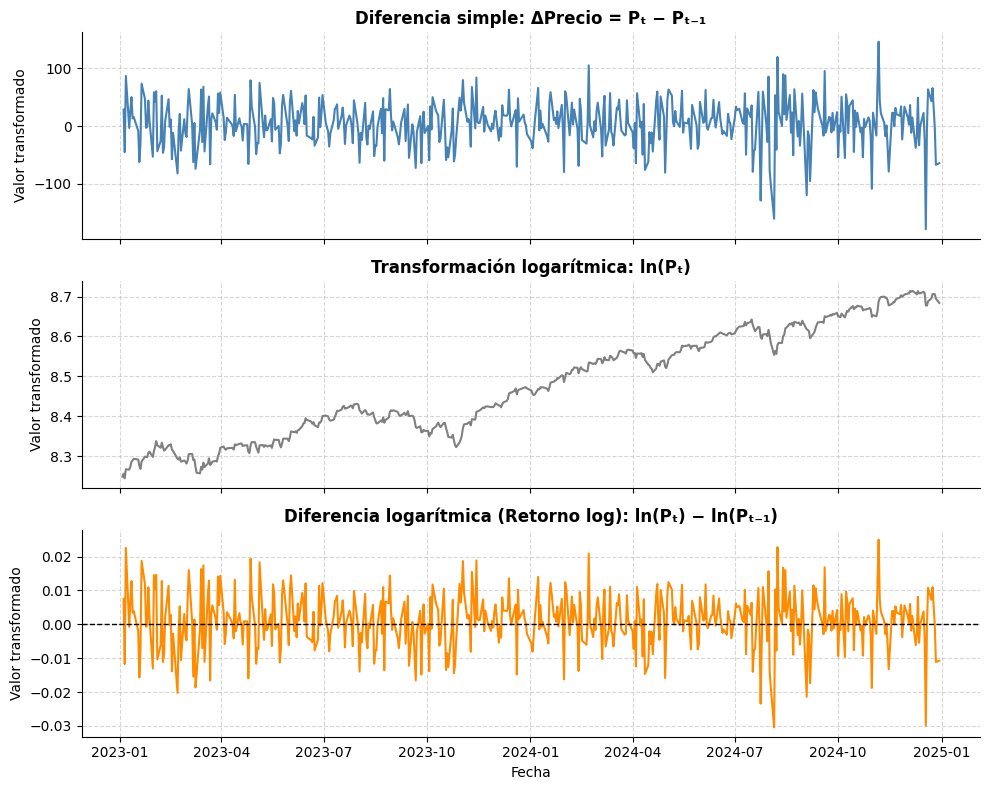

In [16]:
spx["price_diff"] = spx["price"].diff()
spx["log_price"] = np.log(spx["price"])
spx["log_diff"] = spx["log_price"].diff()

fig, axs = plt.subplots(3, 1, figsize=(10,8), sharex = True)

axs[0].plot(spx["price_diff"], color = "steelblue")
axs[0].set_title("Diferencia simple: ΔPrecio = Pₜ − Pₜ₋₁")

axs[1].plot(spx["log_price"], color="gray")
axs[1].set_title("Transformación logarítmica: ln(Pₜ)")

axs[2].plot(spx["log_diff"], color="darkorange")
axs[2].axhline(0, ls="--", color="black", lw=1)
axs[2].set_title("Diferencia logarítmica (Retorno log): ln(Pₜ) − ln(Pₜ₋₁)")

for ax in axs:
    ax.set_ylabel("Valor transformado")
    ax.grid(True, linestyle="--", alpha=0.5)
axs[-1].set_xlabel("Fecha")

plt.tight_layout()
plt.show()

La interpretación de cada componente del gráfico es la siguiente:

- Diferencia simple: elimina la tendencia del precio, pero la escala sigue siendo inestable y sensible a los niveles del índice.

- Transformación logarítmica: reduce la amplitud relativa de las variaciones, pero no elimina la tendencia global del mercado.

- Diferencia logarítmica (retornos): centra la serie alrededor de cero y reduce las variaciones relativas, generando una serie aproximadamente estacionaria en media y varianza.

En el análisis financiero, transformar la serie de precios en retornos logarítmicos no solo es una práctica estadísticamente adecuada, sino también económicamente interpretativa.
Los retornos expresan el cambio porcentual continuo del activo, lo que permite comparar periodos, activos y escalas temporales distintas bajo una métrica consistente y estacionaria.

## 5. Autocorrelación y dependencia temporal

El objetivo de esta sección es analizar si los retornos del S&P 500 presentan dependencia temporal —es decir, si los valores actuales están correlacionados con sus rezagos— o si se comportan como una serie puramente aleatoria (ruido blanco). En series financieras, esta verificación es clave para evaluar eficiencia de mercado y detectar posibles patrones de memoria o volatilidad.

### Autocorrelación (ACF) y autocorrelación parcial (PACF)

La función de autocorrelación (ACF) mide la relación lineal entre una observación y sus valores pasados, mientras que la autocorrelación parcial (PACF) aísla el efecto de rezagos intermedios. Si los retornos son verdaderamente aleatorios, sus autocorrelaciones deben estar cercanas a cero, dentro del intervalo de confianza.

El siguiente paso en el diagnóstico consiste en evaluar si los retornos logarítmicos del S&P 500 presentan algún tipo de dependencia temporal. En una serie de tiempo, la autocorrelación mide la relación entre los valores actuales y sus rezagos. Si los retornos son realmente independientes —como sugiere la hipótesis de eficiencia débil de los mercados—, las autocorrelaciones deberían ser insignificantes en todos los rezagos.

Formalmente, la función de autocorrelación simple (ACF) en el rezago $k$ se define como:

$$
\rho_k = \frac{\text{Cov}(y_t, y_{t-k})}{\sigma^2}
$$

y mide la correlación lineal entre $y_t$ y su versión rezagada $y_{t-k}$.  


Por su parte, la función de autocorrelación parcial (PACF) aísla el efecto de los rezagos intermedios, mostrando la relación directa entre $y_t$ y $y_{t-k}$.

En términos prácticos:
- La ACF revela si la serie muestra persistencia o memoria.  
- La PACF indica qué rezagos específicos contribuyen directamente a esa dependencia.

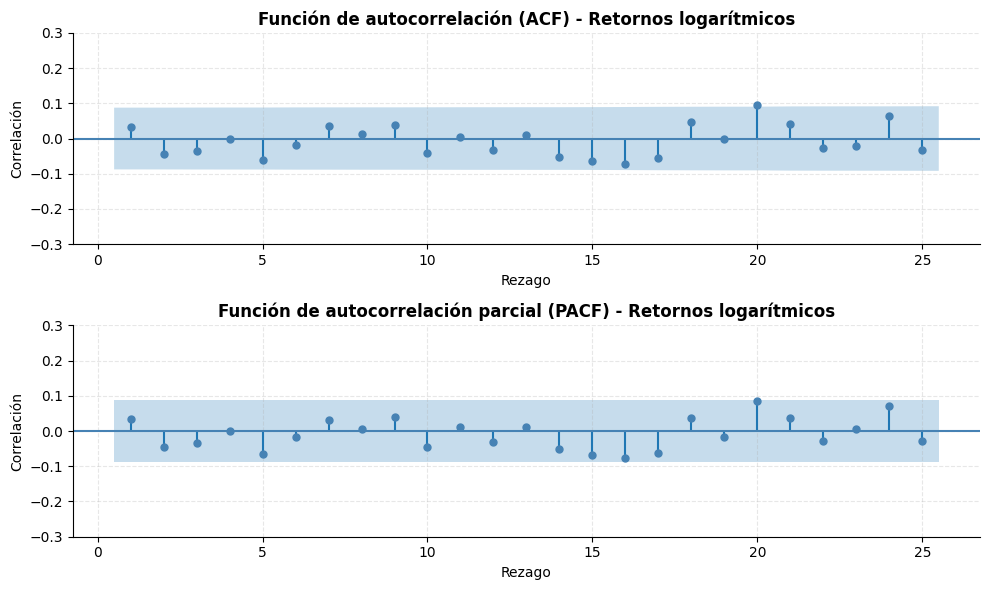

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs =plt.subplots(2, 1, figsize=(10, 6))

plot_acf(spx["rets"].dropna(), lags = 25, ax=axs[0], color = "steelblue", zero=False)
axs[0].set_title("Función de autocorrelación (ACF) - Retornos logarítmicos")
axs[0].set_ylim(-0.3, 0.3)

plot_pacf(spx["rets"].dropna(), lags = 25, ax = axs[1], color = "steelblue", zero=False, method = "ywm")
axs[1].set_title("Función de autocorrelación parcial (PACF) - Retornos logarítmicos")
axs[1].set_ylim(-0.3, 0.3)

for ax in axs:
    ax.set_xlabel("Rezago")
    ax.set_ylabel("Correlación")
    ax.grid(True, linestyle="--", alpha = 0.3)

plt.tight_layout()
plt.show()


En ambas funciones se muestran las correlaciones de los retornos con sus propios rezagos, junto con las bandas de confianza (±1.96/√N).  
Las observaciones son las siguientes:

- La ACF no presenta picos significativos fuera de las bandas, lo que sugiere ausencia de correlación serial en los retornos.  
- La PACF muestra fluctuaciones aleatorias alrededor de cero, sin evidencia de dependencia directa en rezagos específicos.  
- En conjunto, el comportamiento es coherente con una serie aproximadamente estacionaria y sin memoria lineal, característica de un ruido blanco.

Este resultado respalda la idea de que los retornos del S&P 500 no contienen patrones lineales predecibles, al menos en el horizonte diario,  
lo cual es consistente con la hipótesis de eficiencia débil del mercado financiero.

### Prueba Ljung-Box

Si bien las funciones de autocorrelación (ACF y PACF) permiten detectar dependencia visualmente, es recomendable validar formalmente si la serie presenta autocorrelación global.  Para ello se utiliza la prueba de Ljung–Box, que contrasta la hipótesis de independencia de los residuos o de la serie en su conjunto.


$$ H_0: \text{La serie es ruido blanco (no presenta autocorrelación)} \\ $$
$$ H_1: \text{Existe autocorrelación significativa en al menos un rezago.} $$

La estadística de prueba es:

$$
Q = n(n+2) \sum_{k=1}^{m} \frac{\hat{\rho}_k^2}{n - k}
$$

donde $\hat{\rho}_k$ son las autocorrelaciones muestrales hasta el rezago  $m$ y $n$ es el número de observaciones.  
Bajo la hipótesis nula, $Q$ se distribuye aproximadamente como una $\chi$ con $m$ grados de libertad.


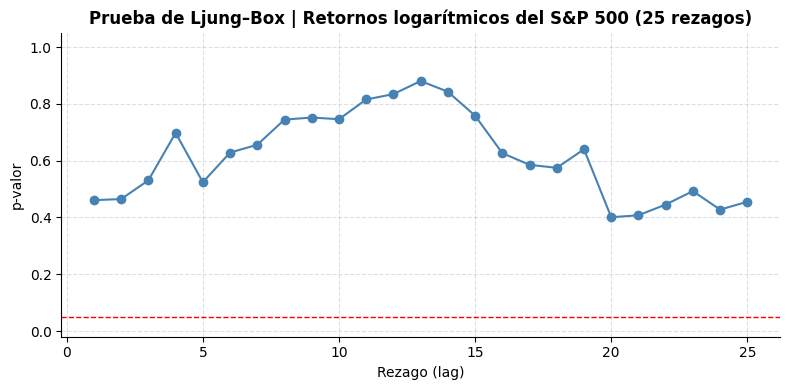

In [18]:
lb_results = acorr_ljungbox(spx["rets"].dropna(), lags=25, return_df=True)

# --- Visualización ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(lb_results.index, lb_results["lb_pvalue"], marker="o", color="steelblue", linewidth=1.5)
ax.axhline(0.05, color="red", linestyle="--", linewidth=1)
ax.set_title("Prueba de Ljung–Box | Retornos logarítmicos del S&P 500 (25 rezagos)")
ax.set_xlabel("Rezago (lag)")
ax.set_ylabel("p-valor")
ax.set_ylim(-0.02, 1.05)
ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

El gráfico anterior muestra los p-valores de la prueba de Ljung–Box para rezagos de 1 a 25. La línea roja discontinua representa el umbral de significancia del 5 %.

- Ningún p-valor cae por debajo del umbral de 0.05.
- Esto implica que no existe autocorrelación significativa en los retornos logarítmicos diarios.  
- La serie se comporta como un proceso de ruido blanco, es decir, cada observación es estadísticamente independiente en media.

En conjunto con los resultados de la ACF y la PACF, la prueba confirma que los movimientos diarios del S&P 500 no presentan memoria lineal, siendo consistentes con la hipótesis de eficiencia débil del mercado.